In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# **Task A: Read the data (already done by loading the dataframe)**

In [2]:
# Load the dataset
file_path = r'/content/airline5 (Dataset).csv'
df = pd.read_csv(file_path)

In [4]:
# Convert the 'Date' column to datetime format, allowing pandas to infer the format
df['Date'] = pd.to_datetime(df['Date'])

# **Task B: Fourier transform of the daily passenger number variation**

In [5]:
# Extract the number of passengers (daily variation)
passenger_numbers = df['Number'].values

In [6]:
# Perform the Fourier transform
N = len(passenger_numbers)
T = 1  # assuming 1 day interval for simplicity
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(passenger_numbers)
xf = fftfreq(N, T)[:N//2]

# **Task C: Distribution of the average daily number of passengers**

In [7]:
# Will group the data by month and compute the average
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Number'].mean()

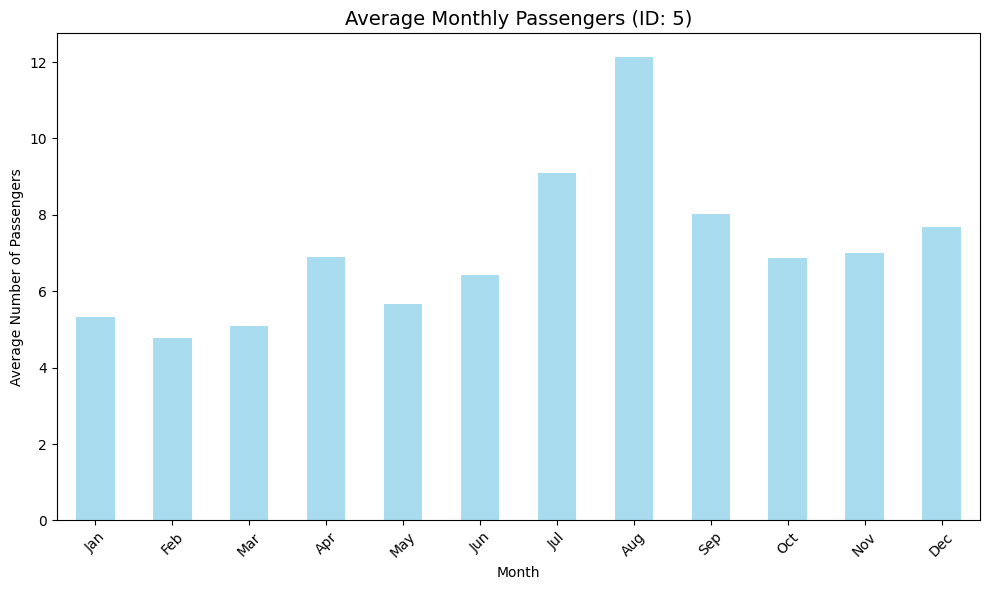

In [8]:
# Plotting the average monthly passenger numbers (Figure 1)
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average Number of Passengers')
plt.title(f'Average Monthly Passengers (ID: 5)', fontsize=14)
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()

# **Task D: Fourier series approximation (using first 8 terms)**

In [9]:
n_terms = 8
approximation = np.zeros(N)
for i in range(n_terms):
    approximation += 2.0 / N * np.real(yf[i] * np.exp(2j * np.pi * xf[i] * x))

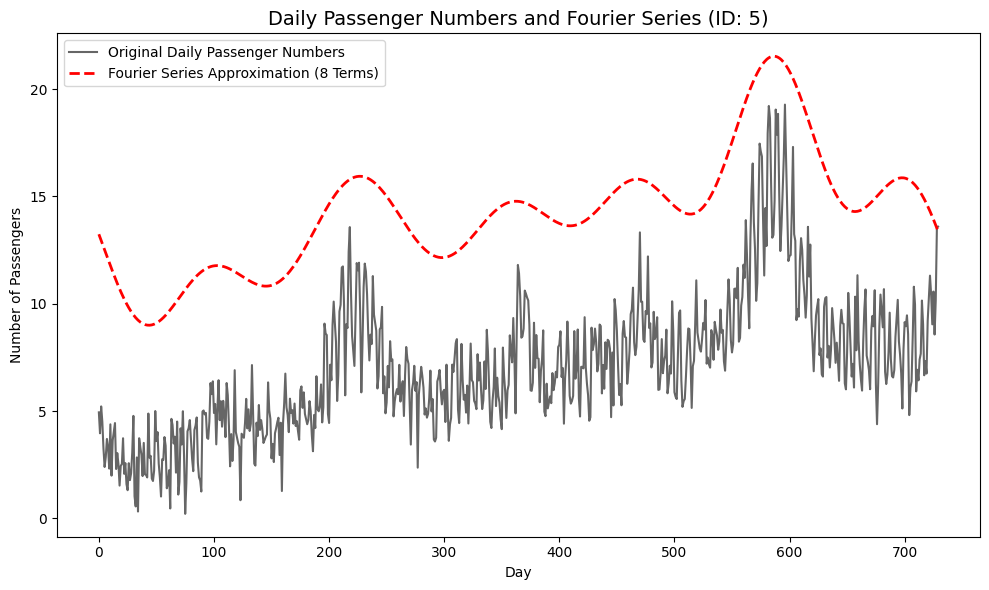

In [10]:
# Plot the Fourier series on top of the average monthly passengers (Figure 1)
plt.figure(figsize=(10, 6))
plt.plot(x, passenger_numbers, label='Original Daily Passenger Numbers', color='black', alpha=0.6)
plt.plot(x, approximation, label='Fourier Series Approximation (8 Terms)', color='red', linestyle='--', linewidth=2)
plt.xlabel('Day')
plt.ylabel('Number of Passengers')
plt.title(f'Daily Passenger Numbers and Fourier Series (ID: 5)', fontsize=14)
plt.legend()
plt.tight_layout()

# **Task E: Power spectrum of the Fourier transform**

In [11]:
power_spectrum = 2.0 / N * np.abs(yf[:N//2])**2

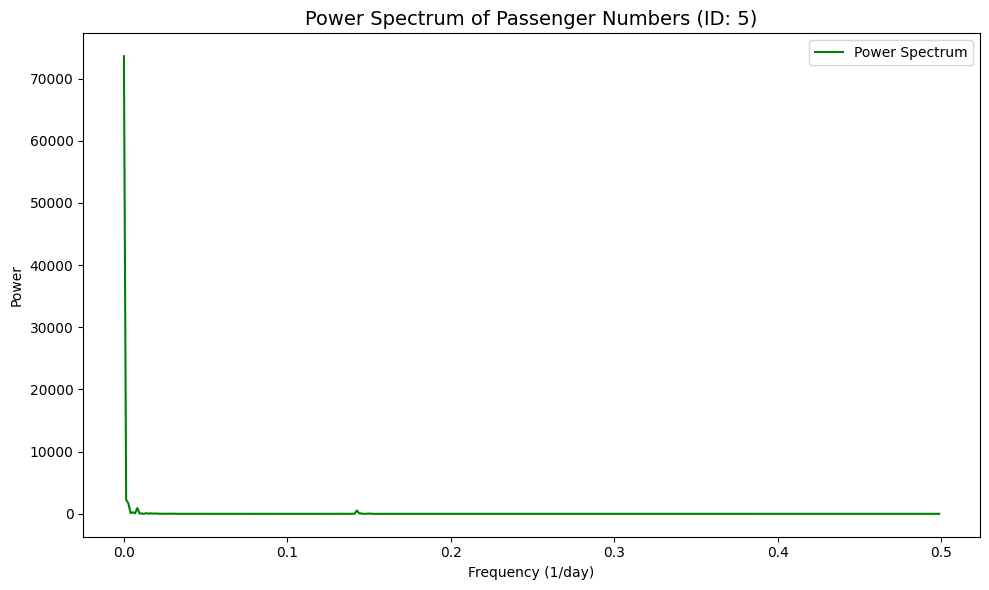

In [12]:
# Plot the power spectrum (Figure 2)
plt.figure(figsize=(10, 6))
plt.plot(xf, power_spectrum, label='Power Spectrum', color='green')
plt.xlabel('Frequency (1/day)')
plt.ylabel('Power')
plt.title(f'Power Spectrum of Passenger Numbers (ID: 5)', fontsize=14)
plt.legend()
plt.tight_layout()

# **Task F: Values X and Y - Periods corresponding to the two highest peaks**

In [13]:
# Identifying the two highest peaks in the power spectrum
sorted_indices = np.argsort(power_spectrum)[-2:]  # Get indices of the two highest peaks
X = 1 / xf[sorted_indices[0]]  # Period for the first peak (in days)
Y = 1 / xf[sorted_indices[1]]  # Period for the second peak (in days)

<ipython-input-13-7e9c0a6636cb>:4: RuntimeWarning: divide by zero encountered in scalar divide
  Y = 1 / xf[sorted_indices[1]]  # Period for the second peak (in days)


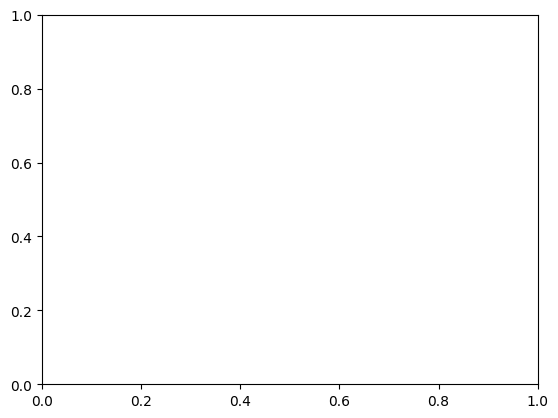

In [19]:
# Printing the periods (X and Y) on the plot
plt.annotate(f'X: {X:.2f} days', xy=(xf[sorted_indices[0]], power_spectrum[sorted_indices[0]]),
             xytext=(xf[sorted_indices[0]], power_spectrum[sorted_indices[0]] + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
plt.annotate(f'Y: {Y:.2f} days', xy=(xf[sorted_indices[1]], power_spectrum[sorted_indices[1]]),
             xytext=(xf[sorted_indices[1]], power_spectrum[sorted_indices[1]] + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')

# Show the plot
plt.show()

In [16]:
# Print the values X and Y
print(f"Period X: {X:.2f} days")
print(f"Period Y: {Y:.2f} days")

Period X: 730.00 days
Period Y: inf days
